In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
from torch.utils.data import Dataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import idx2numpy

In [3]:
MNIST_DIR = "mnist/"

X_mnist = idx2numpy.convert_from_file(MNIST_DIR + "train-images-idx3-ubyte")
X_mnist = X_mnist.reshape(60000, -1) / 255.0
y_mnist = idx2numpy.convert_from_file(MNIST_DIR + "train-labels-idx1-ubyte")

X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)  

x = torch.from_numpy(X_train.astype(np.float32))
y = torch.from_numpy(y_train.astype(np.int64))

In [6]:
class MnistDataset(Dataset):
    def __init__(self, X, y):
        self.x = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.int64))

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.x.shape[0] 

In [23]:
def train_model(model, train_data_loader, test_data_loader):
    criterion = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=0.01)
    train_loss = []
    validation_loss = []

    for epoch in range(20):
        batch_train_loss = []
        for X, y in train_data_loader:
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            batch_train_loss.append(loss.item())
        
        train_loss.append(np.array(batch_train_loss).mean())

        with torch.no_grad():
            batch_validation_loss = []
            for X, y in test_data_loader:
                y_hat = model(X)
                loss = criterion(y_hat, y)
                batch_validation_loss.append(loss.item())

            validation_loss.append(np.array(batch_validation_loss).mean())
        
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1} done!")
            
    return train_loss, validation_loss

In [24]:
class MNistClassifier_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(784, 10)
        
    def forward(self, x):
        x = self.input_layer(x)
        return x

In [25]:
class MNistClassifier_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(784, 16)
        self.activation = nn.Sigmoid()
        self.output_layer = nn.Linear(16, 10)
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.activation(x)
        x = self.output_layer(x)
        return x

In [26]:
class MNistClassifier_3(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(784, 16)
        self.activation = nn.ReLU()
        self.output_layer = nn.Linear(16, 10)
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.activation(x)
        x = self.output_layer(x)
        return x

In [27]:
dataset_train = MnistDataset(X_train, y_train)
data_loader_train = DataLoader(dataset=dataset_train, batch_size=256, shuffle=True)

dataset_test = MnistDataset(X_test, y_test)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=256, shuffle=True)

In [28]:
def plot_loss(train_loss, validation_loss):
    plt.figure(figsize=(8, 4))
    plt.plot(train_loss, c="b", label="Train")
    plt.plot(validation_loss, c="r", label="Validation")
    plt.legend()
    plt.show()

Epoch 5 done!
Epoch 10 done!
Epoch 15 done!
Epoch 20 done!


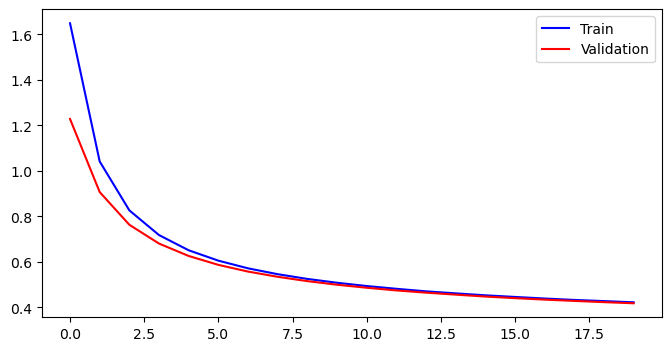

In [29]:
model_1 = MNistClassifier_1()
train_loss, validation_loss = train_model(model_1, data_loader_train, data_loader_test)
plot_loss(train_loss, validation_loss)

Epoch 5 done!
Epoch 10 done!
Epoch 15 done!
Epoch 20 done!


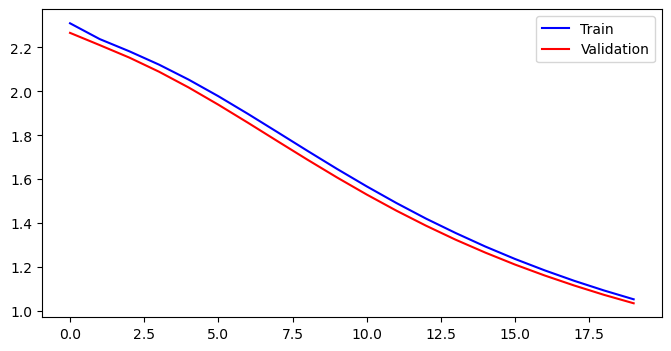

In [30]:
model_2 = MNistClassifier_2()
train_loss, validation_loss = train_model(model_2, data_loader_train, data_loader_test)
plot_loss(train_loss, validation_loss)

Epoch 5 done!
Epoch 10 done!
Epoch 15 done!
Epoch 20 done!


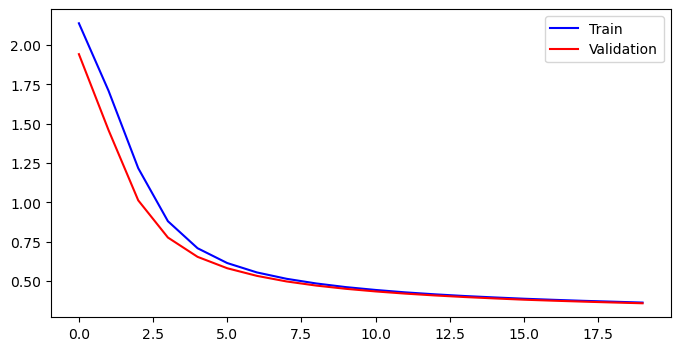

In [31]:
model_3 = MNistClassifier_3()
train_loss, validation_loss = train_model(model_3, data_loader_train, data_loader_test)
plot_loss(train_loss, validation_loss)